# Quantum computing 0 - 100  
Introduction, with Qiskit

### Using conda (optional)  
To create a conda environment (an isolated workspace with minimal packages), use 
``conda create -n qc_classes python=3``  
To use this environment  
``conda activate qc_classes``  


To install Jupyter notebook, use ``pip install jupyter``

### Installation and setting up qiskit  
Qiskit is an open source python based software to simulate and access existing quantum computers provided by IBM. 
You can use Qiskit online on their platform directly at https://quantum-computing.ibm.com/  

The online platform allows you to create and run jupyter notebooks and also has a drag and drop circuit editor with numerous visualization tools. We will try out both now.


To install qiskit, simply run the below command.

In [6]:
#install qiskit and numpy
!pip install qiskit
!pip install qiskit[visualization]
!pip install numpy

# ! is used to run terminal commands in jupyter notebook

Now, to use qiskit simulators and other devices from the IBM quantum experience, you need to create a login in their webpage and add your API token.

In [7]:
from qiskit import IBMQ
IBMQ.save_account('e1ba557b1cb4d8c2b64cf2cb617621f9c198aaceb4210fce7dc3a74e057dbf40b7bd9b18069c2127df6d6daafb4c68966d87d61559f333a7d3d3a5f38150dd1d')
IBMQ.load_account() 


Bad key "text.kerning_factor" on line 4 in
/home/praveen/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
configrc.store_credentials:WARNING:2021-04-27 11:20:52,784: Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### Building your first quantum circuit  
Think of a bag with coloured balls, either |Red> or |green>. Now what if the ball can be both red and green at the same time?  

The Hadamard gate converts |red> state to a superposition of both $\frac{(|red> + |green>)}{2}$, thus a 'superposition' of both colours.  

Lets start with a single Qubit, place it in superposition of |0> (red) and |1> (green) and perform measurement to observe what happens.

<img src="images/superposition.png" width="600">

In [23]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

#make 1 qubit and 1 classical bit to measure results
qbit = QuantumRegister(1)
cbit = ClassicalRegister(1)
circuit = QuantumCircuit(qbit, cbit)

simulator = QasmSimulator()

#adding hadamard gate
circuit.h(qbit[0])

#measure the qubit
circuit.measure(qbit[0], cbit[0])

#Execute the circuit on the qasm simulator
job = simulator.run(circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts as a dictionary
counts = result.get_counts(circuit)
print("\nTotal count for 0 and 1 are:",counts)

# Draw the circuit
circuit.draw()


Total count for 0 and 1 are: {'0': 515, '1': 485}


┌───┐┌─┐
q18_0: ┤ H ├┤M├
       └───┘└╥┘
c18: 1/══════╩═
             0

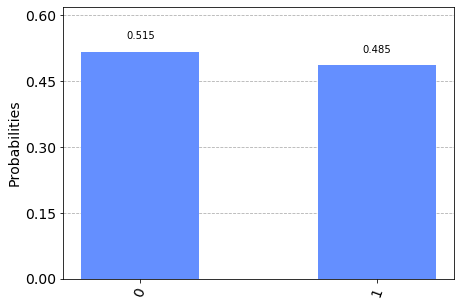

In [24]:
plot_histogram(counts)

You can see that half of the time the ball is measured to 0 and half to 1. A measurement is like checking the colour of the ball, if it is red **or** green which gives us classical information about the ball. Before measurement, the ball is both red **and** green.

Here, 'shots' indicates the number of times the circuit is repeated to obtain the distribution. For quantum circuits, the results are usually probability distribution, so to estimate these, we need to run the circuit multiple times. It's like repeatedly making a superposition of balls and checking the colour.  

Before we go ahead, let's revise the notation we used here. |.> is called a Dirac Ket and represents a quantum state/system. |0>, |1> are two classical 0/1 states and in quantum, we also have states like $a|0> + b|1>$ for $|a|^2 + |b|^2 = 1$. $|a|^2$ and $|b|^2$ act as probabilities of states |0> and |1> when measured.  

We represent this state as a vector $\begin{bmatrix} a \\ b\end{bmatrix}$ where a and b are complex numbers. Operations on a vector can be represented by a matrix. We will see these again later when we discuss linear algebra.  

In the above circuit, we introduced the hadamard gate. Similarly, we have two other simple gates, the X and Z gates. X gate swaps a and b $$a|0> + b|1> \rightarrow b|0> + a|1>$$ and Z gate adds a (-) to |1> $$a|0> + b|1> \rightarrow a|0> - b|1>.$$

Now let's try to entangle two balls and see what happens! 

### Understanding entanglement  
Take two balls, both are |red> initially. Now we apply a Hadamard and put them in superposition individually.  $$|red>|red> => \frac{(|red> + |green>)}{\sqrt{2}}\frac{(|red> + |green>)}{\sqrt{2}}$$

This state is not entangled. Lets see what measurement gives us:

In [25]:
qbits = QuantumRegister(2)
cbits = ClassicalRegister(2)
circuit2 = QuantumCircuit(qbits, cbits)

circuit2.h(qbits)
circuit2.measure(qbits, cbits)
circuit2.draw()

┌───┐┌─┐   
q19_0: ┤ H ├┤M├───
       ├───┤└╥┘┌─┐
q19_1: ┤ H ├─╫─┤M├
       └───┘ ║ └╥┘
c19: 2/══════╩══╩═
             0  1

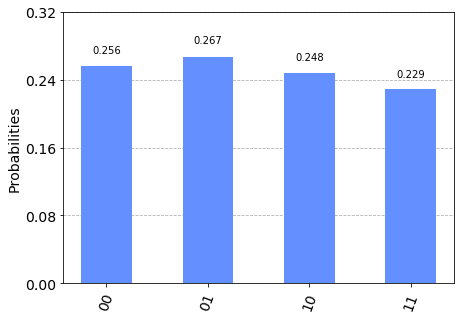

In [26]:
job2 = simulator.run(circuit2, shots=1000)

result2 = job2.result()

count = result2.get_counts(circuit2)

plot_histogram(count)

We see that we get an (almost) equal probability of colours (00, 01, 10, 11). Now lets introduce entanglement using a gate called CNOT, a controlled NOT gate (Also written as CX gate). 

When we apply a CNOT gate on the second ball controlled on the first ball, it changes the second ball colour based on the first ball on which is is applied on. This makes the balls entangled.

In [27]:
qbits = QuantumRegister(2)
cbits = ClassicalRegister(2)
circuit3 = QuantumCircuit(qbits, cbits)

circuit3.h(qbits[0])
circuit3.cx(qbits[0], qbits[1])
circuit3.measure(qbits, cbits)
circuit3.draw()

┌───┐     ┌─┐   
q20_0: ┤ H ├──■──┤M├───
       └───┘┌─┴─┐└╥┘┌─┐
q20_1: ─────┤ X ├─╫─┤M├
            └───┘ ║ └╥┘
c20: 2/═══════════╩══╩═
                  0  1

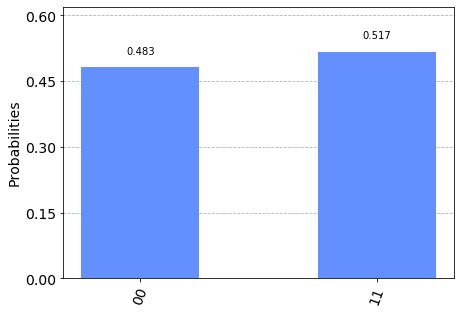

In [28]:
job3 = simulator.run(circuit3, shots=1000)

result3 = job3.result()

count3 = result3.get_counts(circuit3)

plot_histogram(count3)

<img src="images/entanglement.png" width="600">

Remarkably, we only get |00> and |11> state. it's like when first ball is measured to red, the second ball is always red and similarly for green. These states are entangled and influence each other. This state is called the bell state. There are four varieties of bell states.